In [1]:
import networkx as nx
import matplotlib.pyplot as pl
import pandas as pd
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

In [2]:
G=nx.Graph(day="Stackoverflow")
df_nodes=pd.read_csv('stack_network_nodes.csv')
df_edges=pd.read_csv('stack_network_links.csv')


In [3]:
df_nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [4]:
df_edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [5]:
df_nodes['name'].unique()

array(['html', 'css', 'hibernate', 'spring', 'ruby', 'ruby-on-rails',
       'ios', 'swift', 'html5', 'c', 'c++', 'asp.net', 'c#',
       'objective-c', 'javascript', 'jquery', 'redux', 'reactjs', 'php',
       'mysql', 'spring-mvc', '.net', 'react-native', 'spring-boot',
       'less', 'sass', 'hadoop', 'apache-spark', 'sql-server', 'express',
       'node.js', 'mongodb', 'iphone', 'github', 'git', 'excel',
       'excel-vba', 'entity-framework', 'linq', 'wcf', 'wpf', 'android',
       'java', 'scala', 'ajax', 'django', 'python', 'vba', 'xcode',
       'apache', 'nginx', 'angularjs', 'asp.net-web-api', 'laravel',
       'plsql', 'oracle', 'json', 'xml', 'flask', 'wordpress', 'java-ee',
       'maven', 'jsp', 'bash', 'linux', 'angular2', 'typescript',
       'codeigniter', 'tdd', 'agile', 'twitter-bootstrap', 'web-services',
       'rest', 'testing', 'selenium', 'android-studio', 'redis',
       'jenkins', 'docker', 'amazon-web-services', 'angular', 'osx',
       'machine-learning', 'q

In [6]:
df_nodes['group'].unique()

array([ 6,  8,  3,  4,  1,  2, 10,  5, 14,  7, 12, 11,  9, 13],
      dtype=int64)

In [7]:
df_edges['target'].unique()

array(['.net', 'agile', 'ajax', 'amazon-web-services', 'android',
       'android-studio', 'angular', 'angular2', 'angularjs', 'apache',
       'apache-spark', 'api', 'asp.net', 'asp.net-web-api', 'azure',
       'bash', 'bootstrap', 'c', 'c#', 'c++', 'cloud', 'codeigniter',
       'css', 'devops', 'django', 'docker', 'drupal', 'eclipse',
       'elasticsearch', 'embedded', 'entity-framework', 'excel',
       'excel-vba', 'express', 'flask', 'git', 'github', 'go', 'hadoop',
       'haskell', 'hibernate', 'html', 'html5', 'ionic-framework', 'ios',
       'iphone', 'java', 'java-ee', 'javascript', 'jenkins', 'jquery',
       'json', 'jsp', 'laravel', 'less', 'linq', 'linux',
       'machine-learning', 'matlab', 'maven', 'mongodb', 'mvc', 'mysql',
       'nginx', 'node.js', 'objective-c', 'oracle', 'osx', 'perl',
       'photoshop', 'php', 'plsql', 'postgresql', 'powershell', 'python',
       'qt', 'r', 'react-native', 'reactjs', 'redis', 'redux', 'regex',
       'rest', 'ruby', 'ruby-on-

In [8]:
for index,row in df_nodes.iterrows():
    G.add_node(row['name'],group=row['group'],nodesize=row['nodesize'])

In [10]:
for index,row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'],row['target'],row['value'])])

In [14]:
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

In [41]:
pl.figure(figsize=(25,25))
options={
    'edge_color':'#000000',
    'width':1,
    'with_labels':True,
    'font_weight':'regular'
}
colors = [color_map[G.nodes[node]['group']] for node in G]
sizes=[G.nodes[node]['nodesize']*10 for node in G]

<Figure size 1800x1800 with 0 Axes>

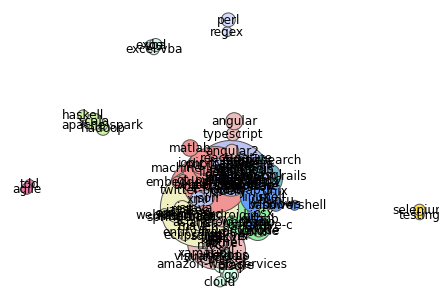

In [42]:
nx.draw(G,node_color=colors,node_size=sizes,pos=nx.spring_layout(G,k=0.25,
                                                                iterations=50),
       **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
pl.show()

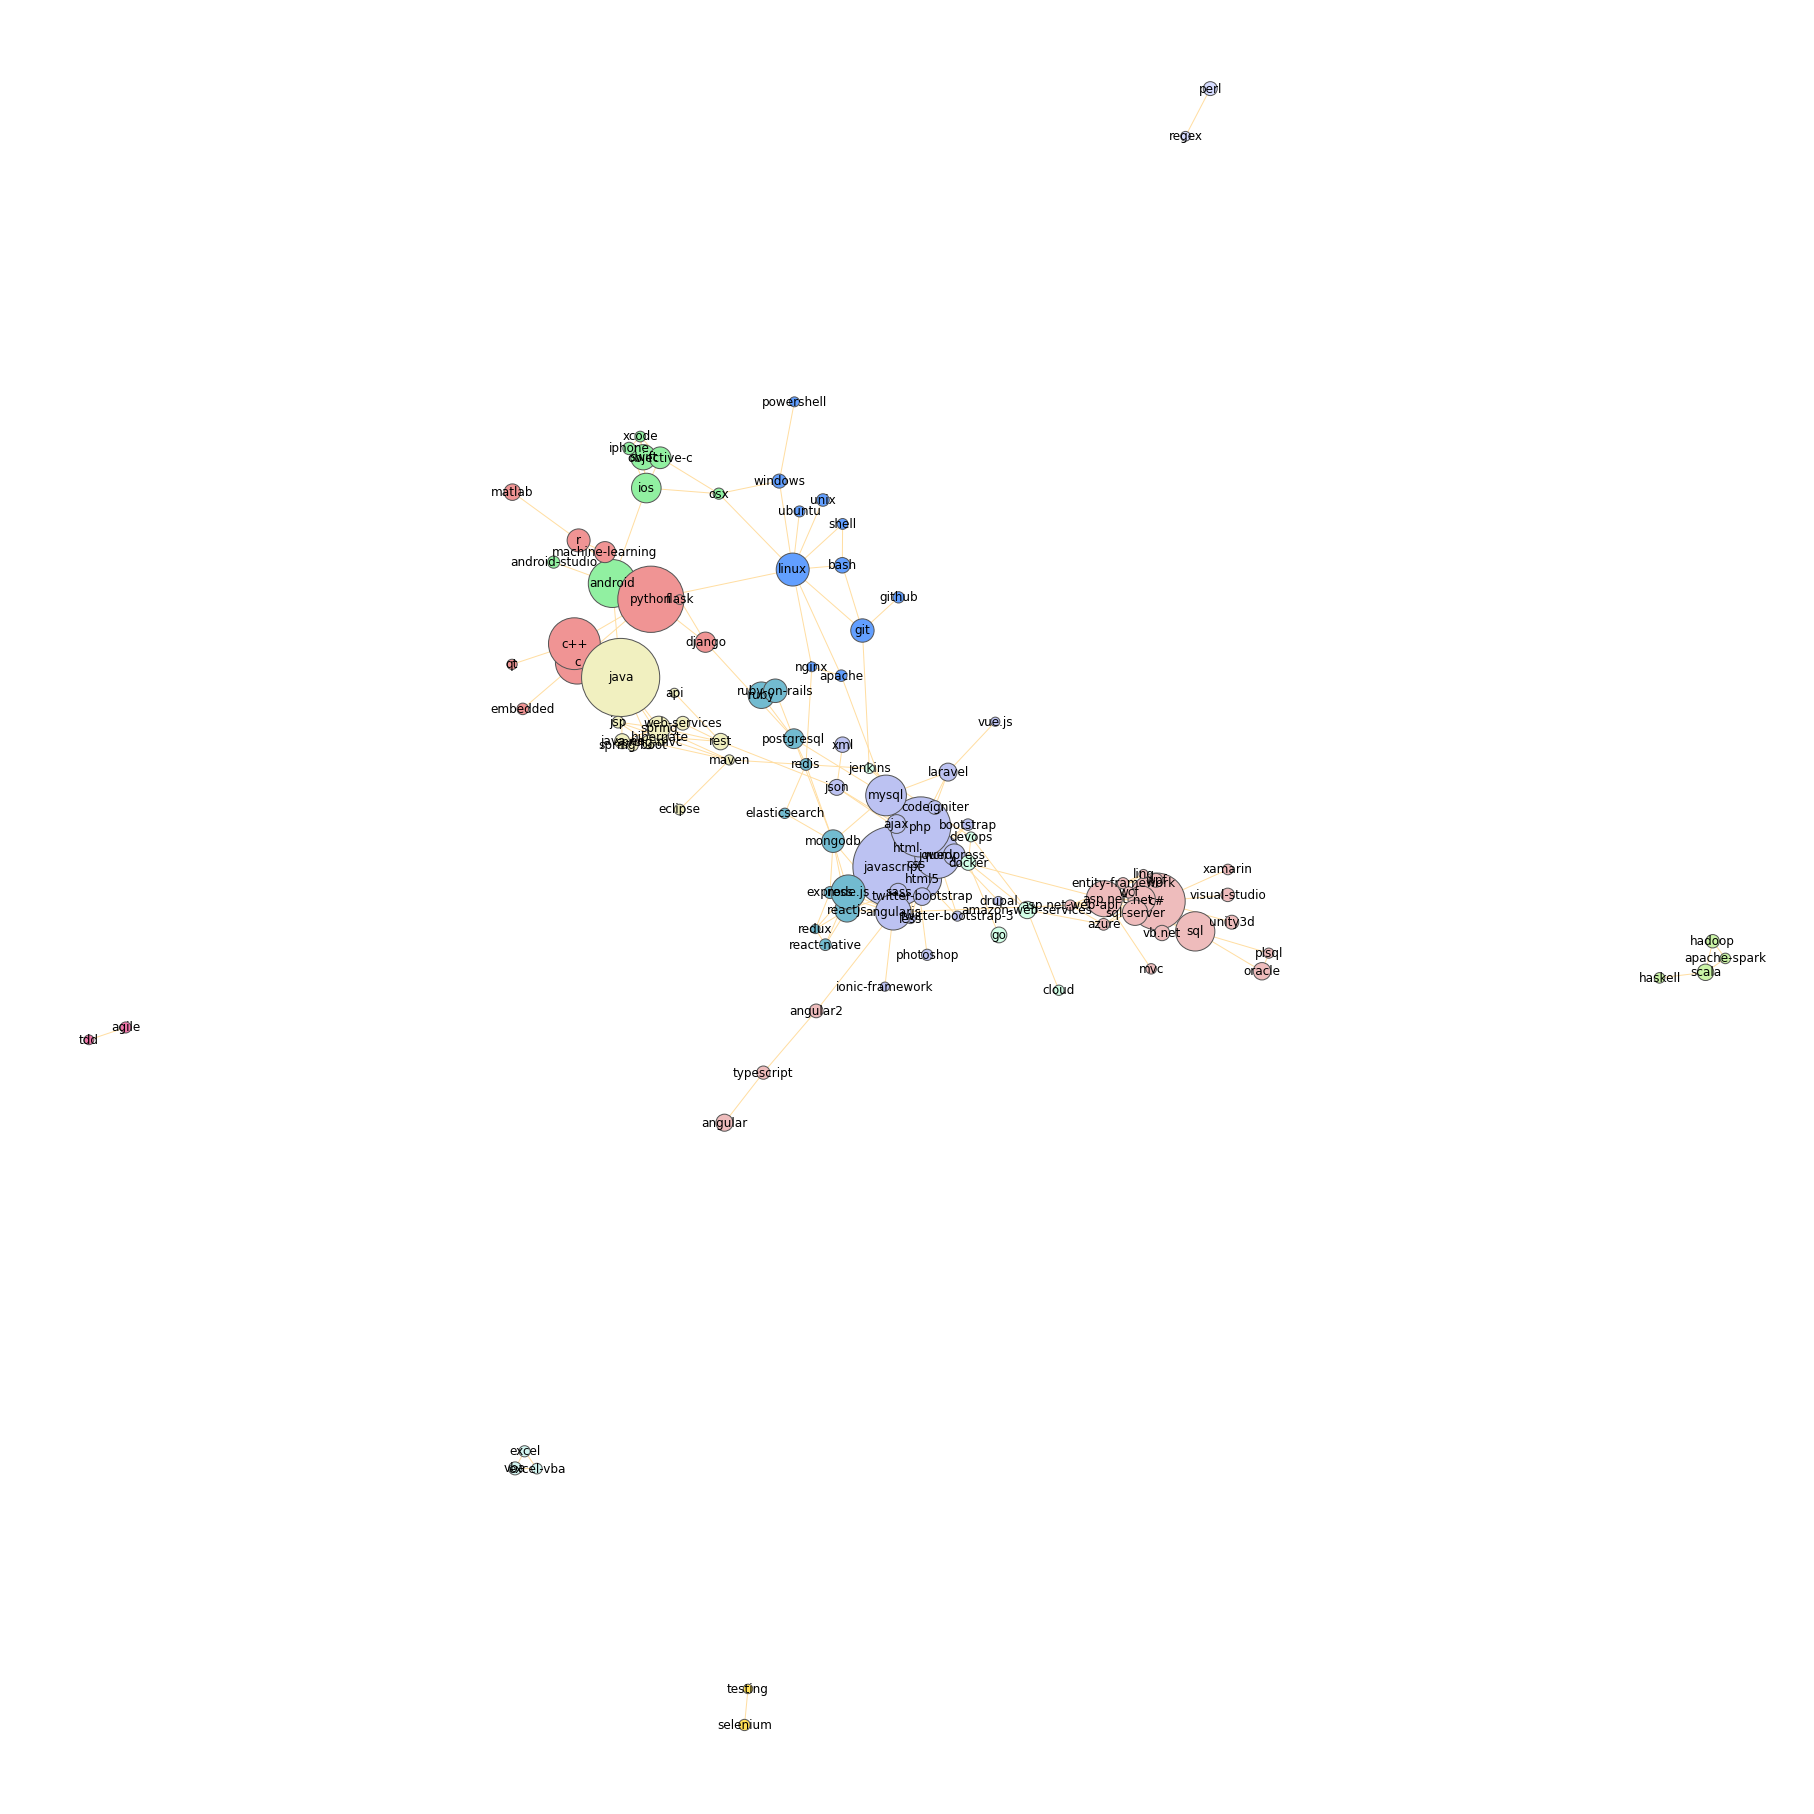

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Input data files check
from subprocess import check_output

import warnings
warnings.filterwarnings('ignore')

G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('stack_network_nodes.csv')
df_edges = pd.read_csv('stack_network_links.csv')

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()